# Exploratory Data Analysis of tweets

In [1]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import nltk
from nltk.probability import FreqDist

# Creating stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Add numbers to the stop words list and specific words in our dataframe
stop_words.update(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
                  "replying", "wy", "weyerhaeyser", "bp", "fmc", "co", "corp"])

# Create a function to check if a word starts with a number


def starts_with_number(word):
    return word[0].isdigit()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarrabenyahia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
WEYERHAEUSER_CO = "./data_cleaned/webscraped_WEYERHAEUSER_CO.csv/part-00000-17a4305d-9672-4ddf-87fc-d180dcf01612-c000.csv"
BP_PLC = "./data_cleaned/webscraped_BP_PLC.csv/part-00000-60047cdf-7f10-49f8-932e-065bb69f747c-c000.csv"
FMC_CORP = "./data_cleaned/webscraped_FMC_CORP.csv/part-00000-9fe4bf5d-f913-4d0c-a98a-8f1d088639ee-c000.csv"


In [3]:
tweets_df = pd.read_csv(WEYERHAEUSER_CO)


In [4]:
tweets_df.head()


,User,Handle,PostDate,TweetText,ReplyCount,RetweetCount,LikeCount
0,セルディト,stockinfo2110,2022-03-22,00 1 align technology inc 2 wells fargo co 3 c...,0.0,0.0,0.0
1,セルディト,stockinfo2110,2022-09-20,00 1 wynn resorts ltd 2 las vegas sands corp 3...,0.0,0.0,0.0
2,セルディト,stockinfo2110,2022-03-22,0400 1 tesla inc 2 moderna inc 3 align technol...,0.0,0.0,0.0
3,Lending Alpha,LendingAlpha,2018-01-14,american trust investment advisors lowered wey...,0.0,0.0,0.0
4,Alessandro Bellese,ale_bellese,2017-12-06,and who knew that 17thplace weyerhaeuser co wy...,0.0,0.0,0.0


## Wordclouds

In [5]:
# creation of masks for ploting specific wordclouds per year
mask_2022 = pd.to_datetime(tweets_df['PostDate']).dt.year == 2022
mask_2021 = pd.to_datetime(tweets_df['PostDate']).dt.year == 2021
mask_2020 = pd.to_datetime(tweets_df['PostDate']).dt.year == 2020
mask_2019 = pd.to_datetime(tweets_df['PostDate']).dt.year == 2019
mask_2018 = pd.to_datetime(tweets_df['PostDate']).dt.year == 2018
mask_2017 = pd.to_datetime(tweets_df['PostDate']).dt.year == 2017


### General wordcloud for all years

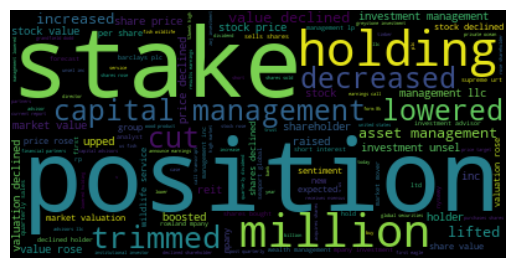

In [6]:
# we select all the tweets from 2017 to 2022
import matplotlib.pyplot as plt
tweet_list = tweets_df["TweetText"].tolist()
# join all tweets into a single string
tweet_string = ' '.join(tweet_list)
# we have decided to remove the name of the company because is our keyword
tweet_string = tweet_string.replace("weyerhaeuser", "").replace("co", "")
# create the word cloud
wordcloud = WordCloud(stopwords=stop_words).generate(tweet_string)
# show the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Wordcloud per years

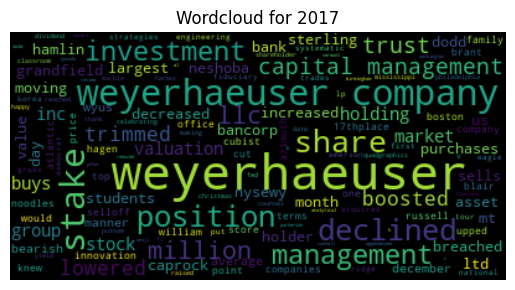

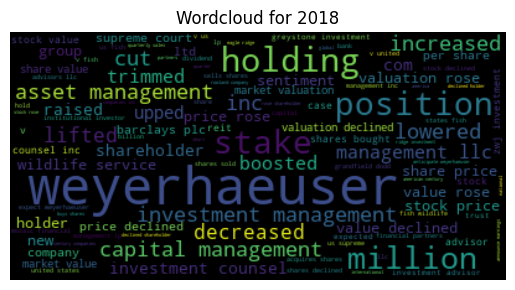

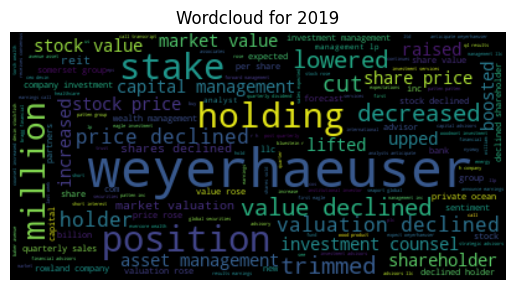

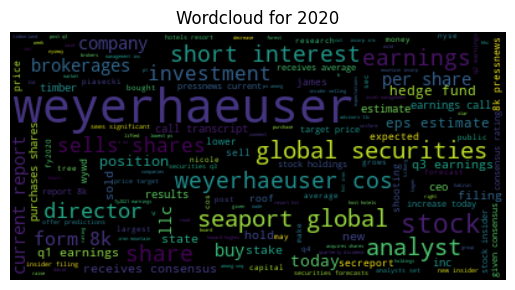

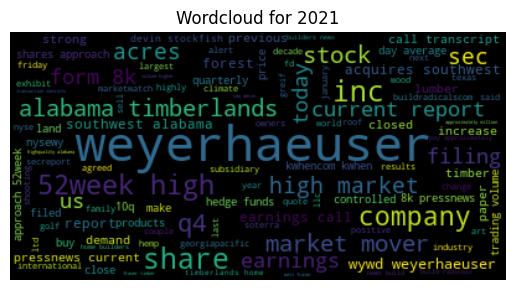

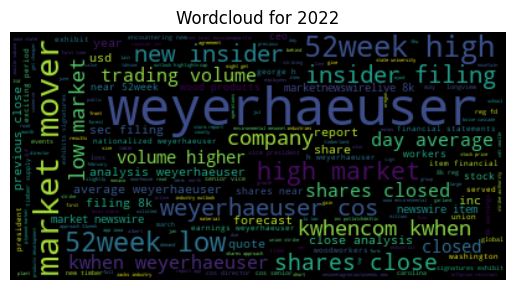

In [7]:
# we select all the tweets from 2017 to 2022
years = [2017, 2018, 2019, 2020, 2021, 2022]
masks = [mask_2017, mask_2018, mask_2019, mask_2020, mask_2021, mask_2022]

for year, mask in zip(years, masks):
    tweet_list = tweets_df.loc[mask, "TweetText"].tolist()
    # join all tweets into a single string
    tweet_string = ' '.join(tweet_list)
    # create the word cloud
    wordcloud = WordCloud(stopwords=stop_words).generate(tweet_string)
    # show the word cloud
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Wordcloud for {year}")
    plt.show()


## Tweet Length

In [8]:
# we add a column with the length of each tweet
tweets_df['tweet_length'] = tweets_df['TweetText'].apply(
    lambda x: len(x.split()))


### General tweet length 

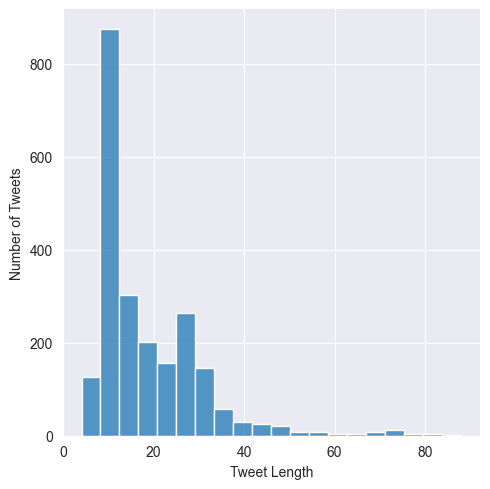

In [9]:
sns.set_style("darkgrid")
sns.displot(tweets_df['tweet_length'], bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.show()


### Tweet lengths per year

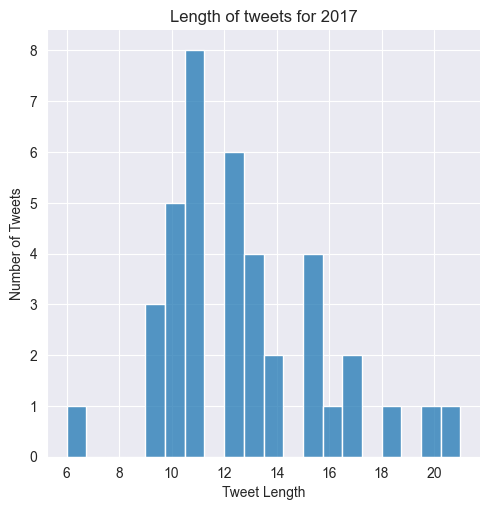

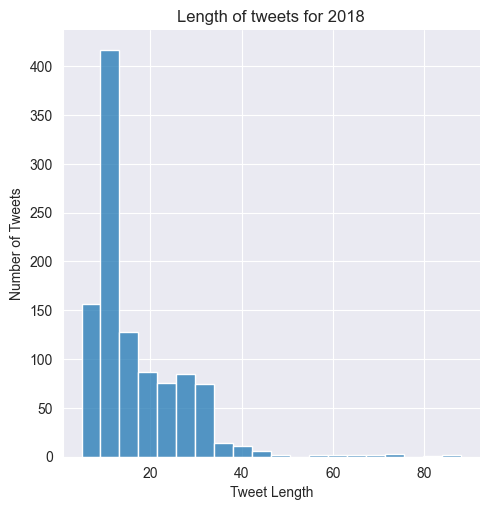

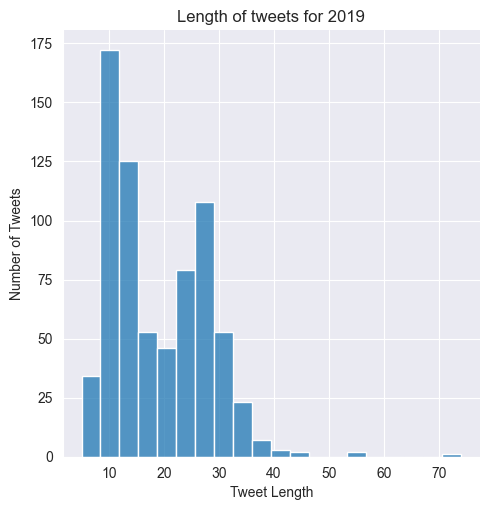

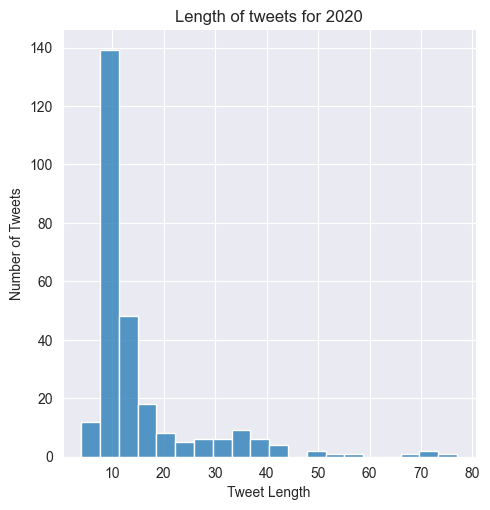

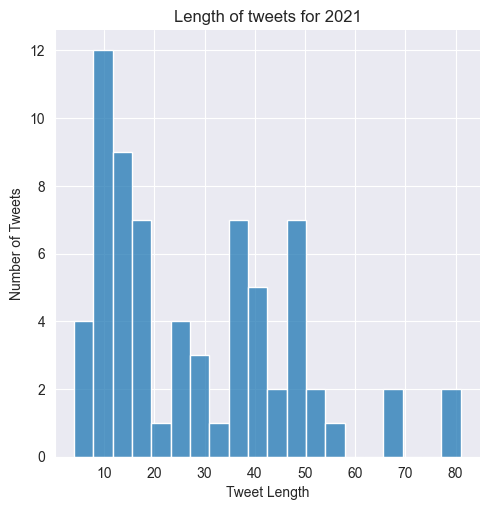

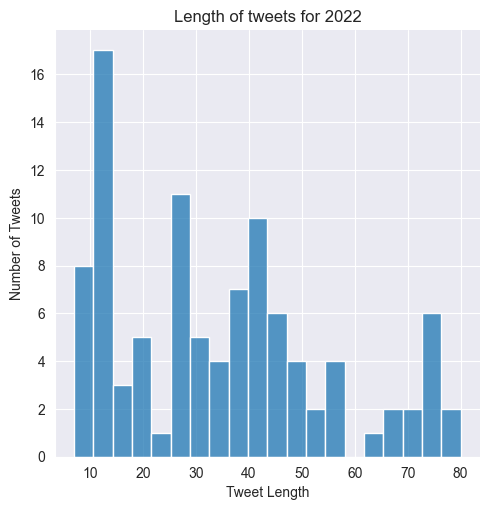

In [16]:
for year, mask in zip(years, masks):
    sns.set_style("darkgrid")
    sns.displot(tweets_df.loc[mask, 'tweet_length'], bins=20)
    plt.title(f"Length of tweets for {year}")
    plt.xlabel('Tweet Length')
    plt.ylabel('Number of Tweets')
    plt.show()


## Average word length

### General average word length

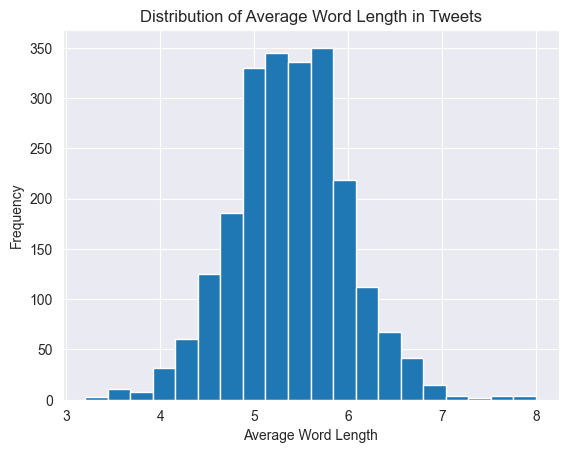

In [11]:
# calculate the average word length for each tweet
tweets_df["avg_word_length"] = tweets_df["TweetText"].apply(
    lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# create the histogram
plt.hist(tweets_df["avg_word_length"], bins=20)
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.title("Distribution of Average Word Length in Tweets")
plt.show()


### Average word length per year

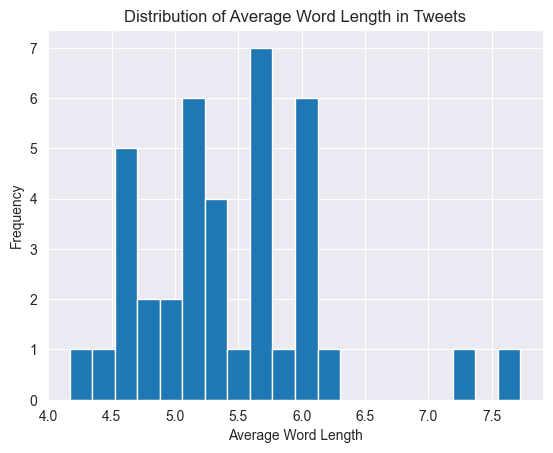

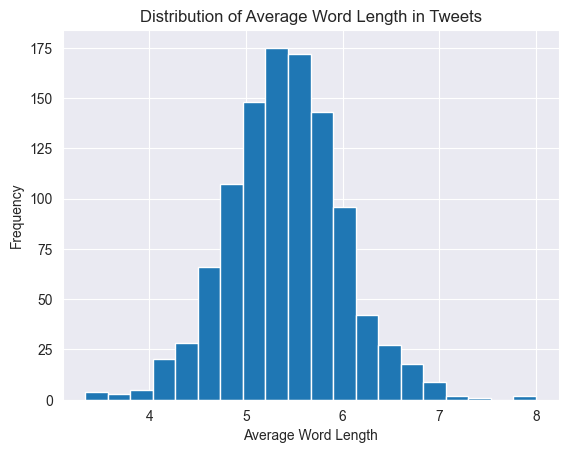

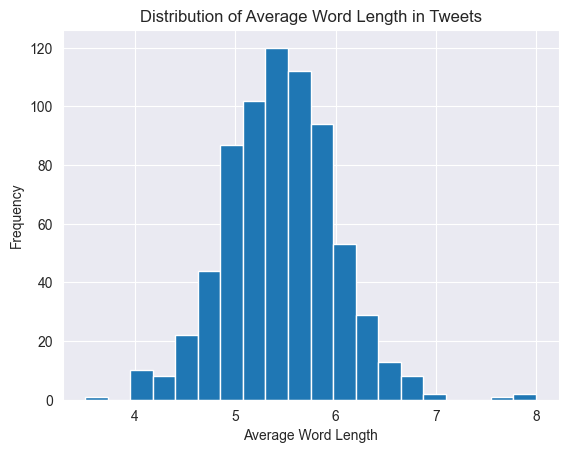

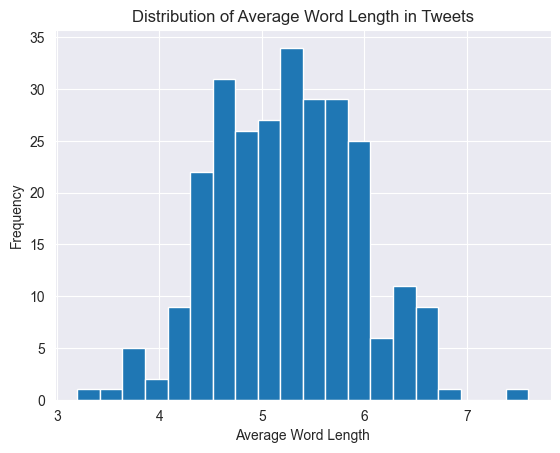

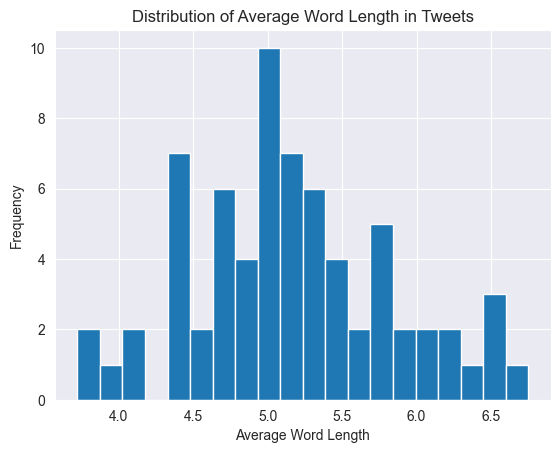

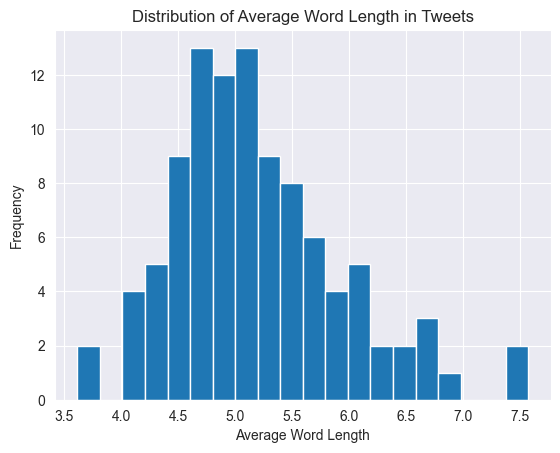

In [17]:
for year, mask in zip(years, masks):
    tweets_df["avg_word_length"] = tweets_df.loc[mask, 'TweetText'].apply(
        lambda x: sum(len(word) for word in x.split()) / len(x.split()))
    plt.hist(tweets_df["avg_word_length"], bins=20)
    plt.xlabel("Average Word Length")
    plt.ylabel("Frequency")
    plt.title("Distribution of Average Word Length in Tweets")
    plt.show()

## Most common words

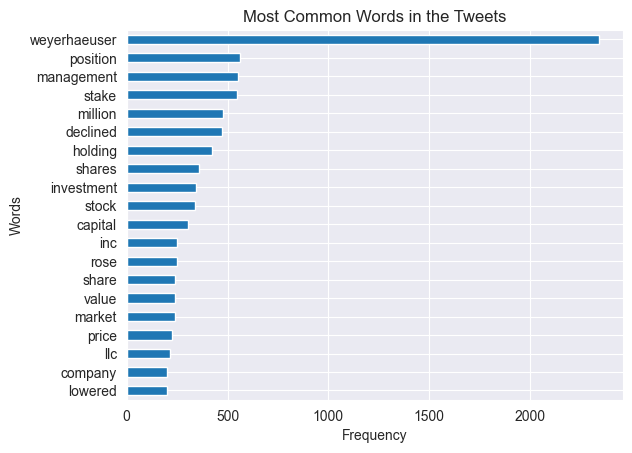

In [12]:
# Create a list of all the words in the column 'TweetText'
all_words = ' '.join(tweets_df['TweetText'])

# Split the list into individual words
words = all_words.split()
words = [word for word in words if (
    word.lower() not in stop_words) and (not starts_with_number(word))]

# Use the pandas method 'value_counts' to get the frequency of each word
word_freq = pd.Series(words).value_counts()

# Plot the top 20 most common words
word_freq[:20].sort_values(ascending=True).plot.barh()

# Add a title and labels
plt.title("Most Common Words in the Tweets")
plt.xlabel("Frequency")
plt.ylabel("Words")

# Show the plot
plt.show()


## Frequence distribution of most common words

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sarrabenyahia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


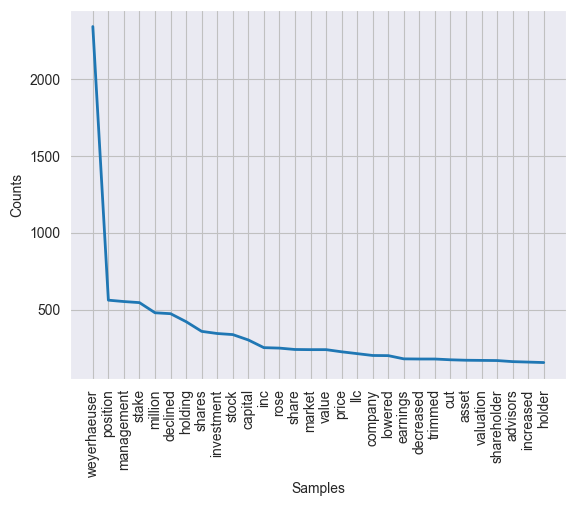

In [13]:

# Create a list of all the tweets
tweets = tweets_df["TweetText"].tolist()

# Perform text pre-processing
nltk.download('punkt')
tweets = [nltk.word_tokenize(tweet) for tweet in tweets]
tweets = [[word.lower() for word in tweet if (word.lower() not in stop_words)
           and (not starts_with_number(word))] for tweet in tweets]
# Create a frequency distribution of the words
fdist = FreqDist(word for tweet in tweets for word in tweet)

# Plot the most common words
fdist.plot(30, cumulative=False)
plt.show()


## Treemap of most common words

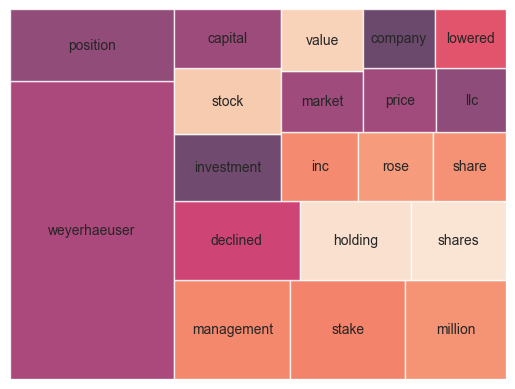

In [14]:
import squarify
import matplotlib.pyplot as plt
from collections import Counter

# assuming your dataframe is named 'df' and the column with the tweets is named 'TweetText'
tweet_text = tweets_df['TweetText'].str.cat(sep=' ')

# split the words and remove stopwords
filtered_words = [word for word in tweet_text.split() if (
    word.lower() not in stop_words) and (not starts_with_number(word))]

# get the top 10 most common words
common_words = Counter(filtered_words).most_common(20)

# create the treemap
squarify.plot(sizes=[count for word, count in common_words], label=[
              word for word, count in common_words], alpha=.8)
plt.axis('off')
plt.show()


## Most common unique words in tweets

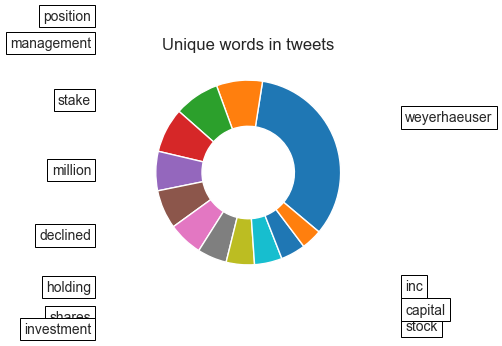

In [15]:
all_words = ' '.join(tweets_df['TweetText']).split()

# Filter out the stop words and words starting with numbers
all_words = [word for word in all_words if (
    word.lower() not in stop_words) and (not starts_with_number(word))]

# Count the number of occurrences of each word
word_counts = Counter(all_words)

# Get the unique words and their counts
unique_words = dict(word_counts)

# Sort the dictionary by values (word counts) in descending order
unique_words = dict(sorted(unique_words.items(),
                    key=lambda item: item[1], reverse=True))

# Keep the first n items where n is the number of items you want to keep
n = 12
unique_words = dict(list(unique_words.items())[:n])

# Plot the donut chart
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data = list(unique_words.values())

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    kw["va"] = "center"
    ax.annotate(list(unique_words.keys())[i], xy=(x, y), xytext=(1.7*np.sign(x), 1.7*y),
                horizontalalignment=horizontalalignment, **kw)


ax.set_title("Unique words in tweets")

plt.show()
